<a href="https://colab.research.google.com/github/Konovalo/excel/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81_%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*   titaniс_data.csv Информация о пассажирах
*   titanic_surv.csv ВЫжил пассажир или нет

In [6]:
passager = pd.read_csv("titanic_data.csv", index_col = 'PassengerId')
passager.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#сначала узнаем сколько строк и столбцов
passager.shape

(891, 10)

In [ ]:
# выведем информацию о таблице
#сначала узнаем сколько строк и столбцов
passager.info()
# в годе есть пропуски и в кабине тоже

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [ ]:
#выведем статистику
passager.describe()
# если значение не числовое, то у него не будет среднего значения (дисперсии)
'''Метод .describe() для каждой числовой колонки выдает информацию о статистиках:
count: количество не-NaN значений в колонке;
mean: арифметическое среднее значений в колонке;
std: стандартное отклонение значений в колонке;
min: минимальное значение в колонке;
25%: 25-процентная перцентиль значений в колонке;
50%: 50-процентная перцентиль значений в колонке;
75%: 75-процентная перцентиль значений в колонке;
max: максимальное значение в колонке.'''

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Проводить первичный анализ данных обязательно!!! Иначе на машинное обучения попадут данные с ошибками

In [ ]:
# удобно перевести столбец в массив numpy и работать через него
age_np = np.array(passager['Age'])
age_np

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

<Axes: >

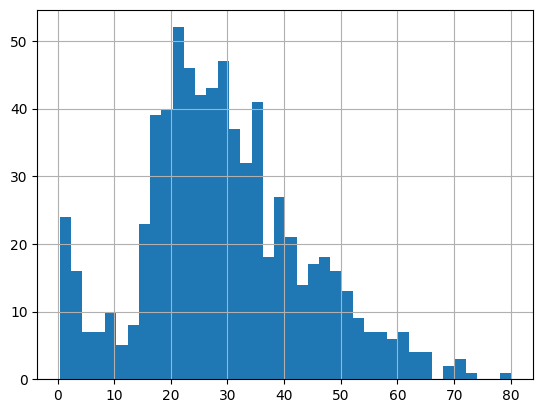

In [ ]:
# для числовых данных можно строить гистограмму - построим ее
passager['Age'].hist(bins = 40)
# Как строиться, берется мин и макс значение и делиться промежуток на 40 частей

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

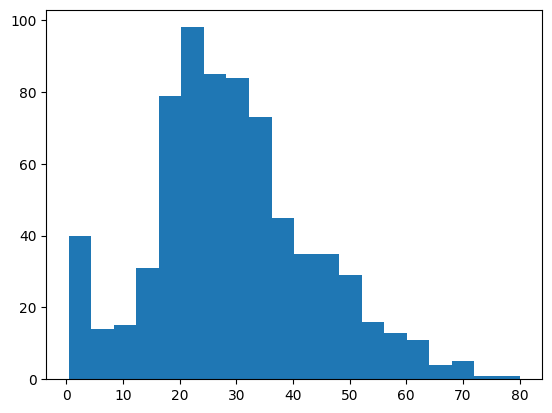

In [ ]:
# тоже что и выше, но с помощью другой библиотеки
plt.hist(passager['Age'], bins = 20)

In [ ]:
# для не числовых значений можно применить value_counts
passager['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
passager['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Если значения числовые и много разных значений, то удобнее использовать гистограмму, так как через **value_counts** могут поместиться не все значения на экран и читаются не супер удобно

In [ ]:
# Выберем из таблицы только те строки,которые соответствуют мужчинам
mens = passager[passager['Sex'] == 'male']
mens.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
passager['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
rez = passager[((passager['Sex'] == 'male') | ((passager['Pclass'] == 1) & (passager['Age'] > 60)))]
rez.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
# записать класс каюты 1 или 2 можно и по другому
passager[passager['Pclass'].isin([1,2])]
# мы выбираем только тех, пассажиров, у которых класс находится в диапазоне значений массива 1 и 2

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [ ]:
# можем найти сколько всего родственников на Титанике, для этого создадим новую колонку
new_colonka = passager['SibSp'] + passager['Parch']
new_colonka

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    3
890    0
891    0
Length: 891, dtype: int64

In [ ]:
# добавляем новую колонку с именем new_c (можно любое другое)
passager['new_c'] = new_colonka
passager.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_c
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# Удалить колонки можно с помощью метода drop
passager = passager.drop(columns = ["SibSp", "Parch"])
passager.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S


In [ ]:
# Заменить значения в колонках с определенным условием
passager.loc[passager["Sex"] == 'male', "Sex"] = 0
# теперь у нас пол числовое значение (где было значение "male")
passager.loc[passager["Sex"] == 'female', "Sex"] = 0
passager.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S


**Слияние таблиц**

In [8]:
surv = pd.read_csv("titanic_surv.csv", index_col = 'PassengerId')
surv.head()
# создадим вторую таблицу о выживании пассажира

,Survived
PassengerId,
0,0
1,1
2,1
3,1
4,0


In [15]:
titanik = passager.join(surv)
titanik.head()
# обязательно должен быть ключ (у нас PassengerId) и этот столбец остается один

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1.0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,0.0
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0.0


**Всегда вместо цикла выгодно использовать методы Pandas или numpy**

In [10]:
# Удобно работать с числовыми данными, поэтому колонку пол заменим на "1" и "0",
# это можно сделать проще, чем ранее
sex = passager["Sex"]
sex = (sex == "male").astype(int)
passager["Sex"] = sex
passager.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Заменим данные и в колонке Embarked
em = passager["Embarked"]
em_dict = {
    "S" : 0,
    "C" : 1,
    "Q" : 2
}
em = em.map(em_dict)
passager["Embarked"] = em
passager.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


Text(0, 0.5, 'Fare')

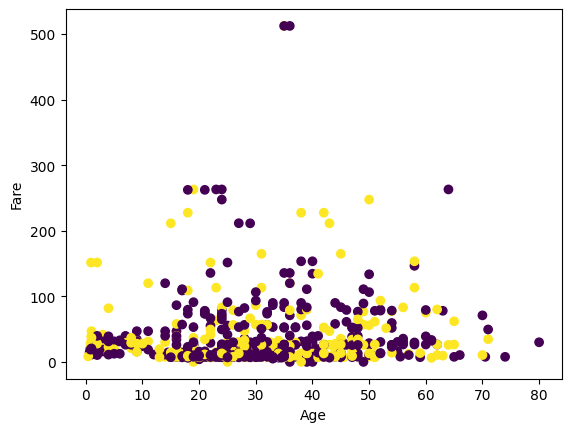

In [16]:
#Визуализруем с помощью matplotlib
plt.scatter(titanik["Age"], titanik["Fare"], c = titanik["Survived"])

plt.xlabel("Age")
plt.ylabel("Fare")
#обрати внимание, таблица берется объедененная, у меня другое название у нее titanik

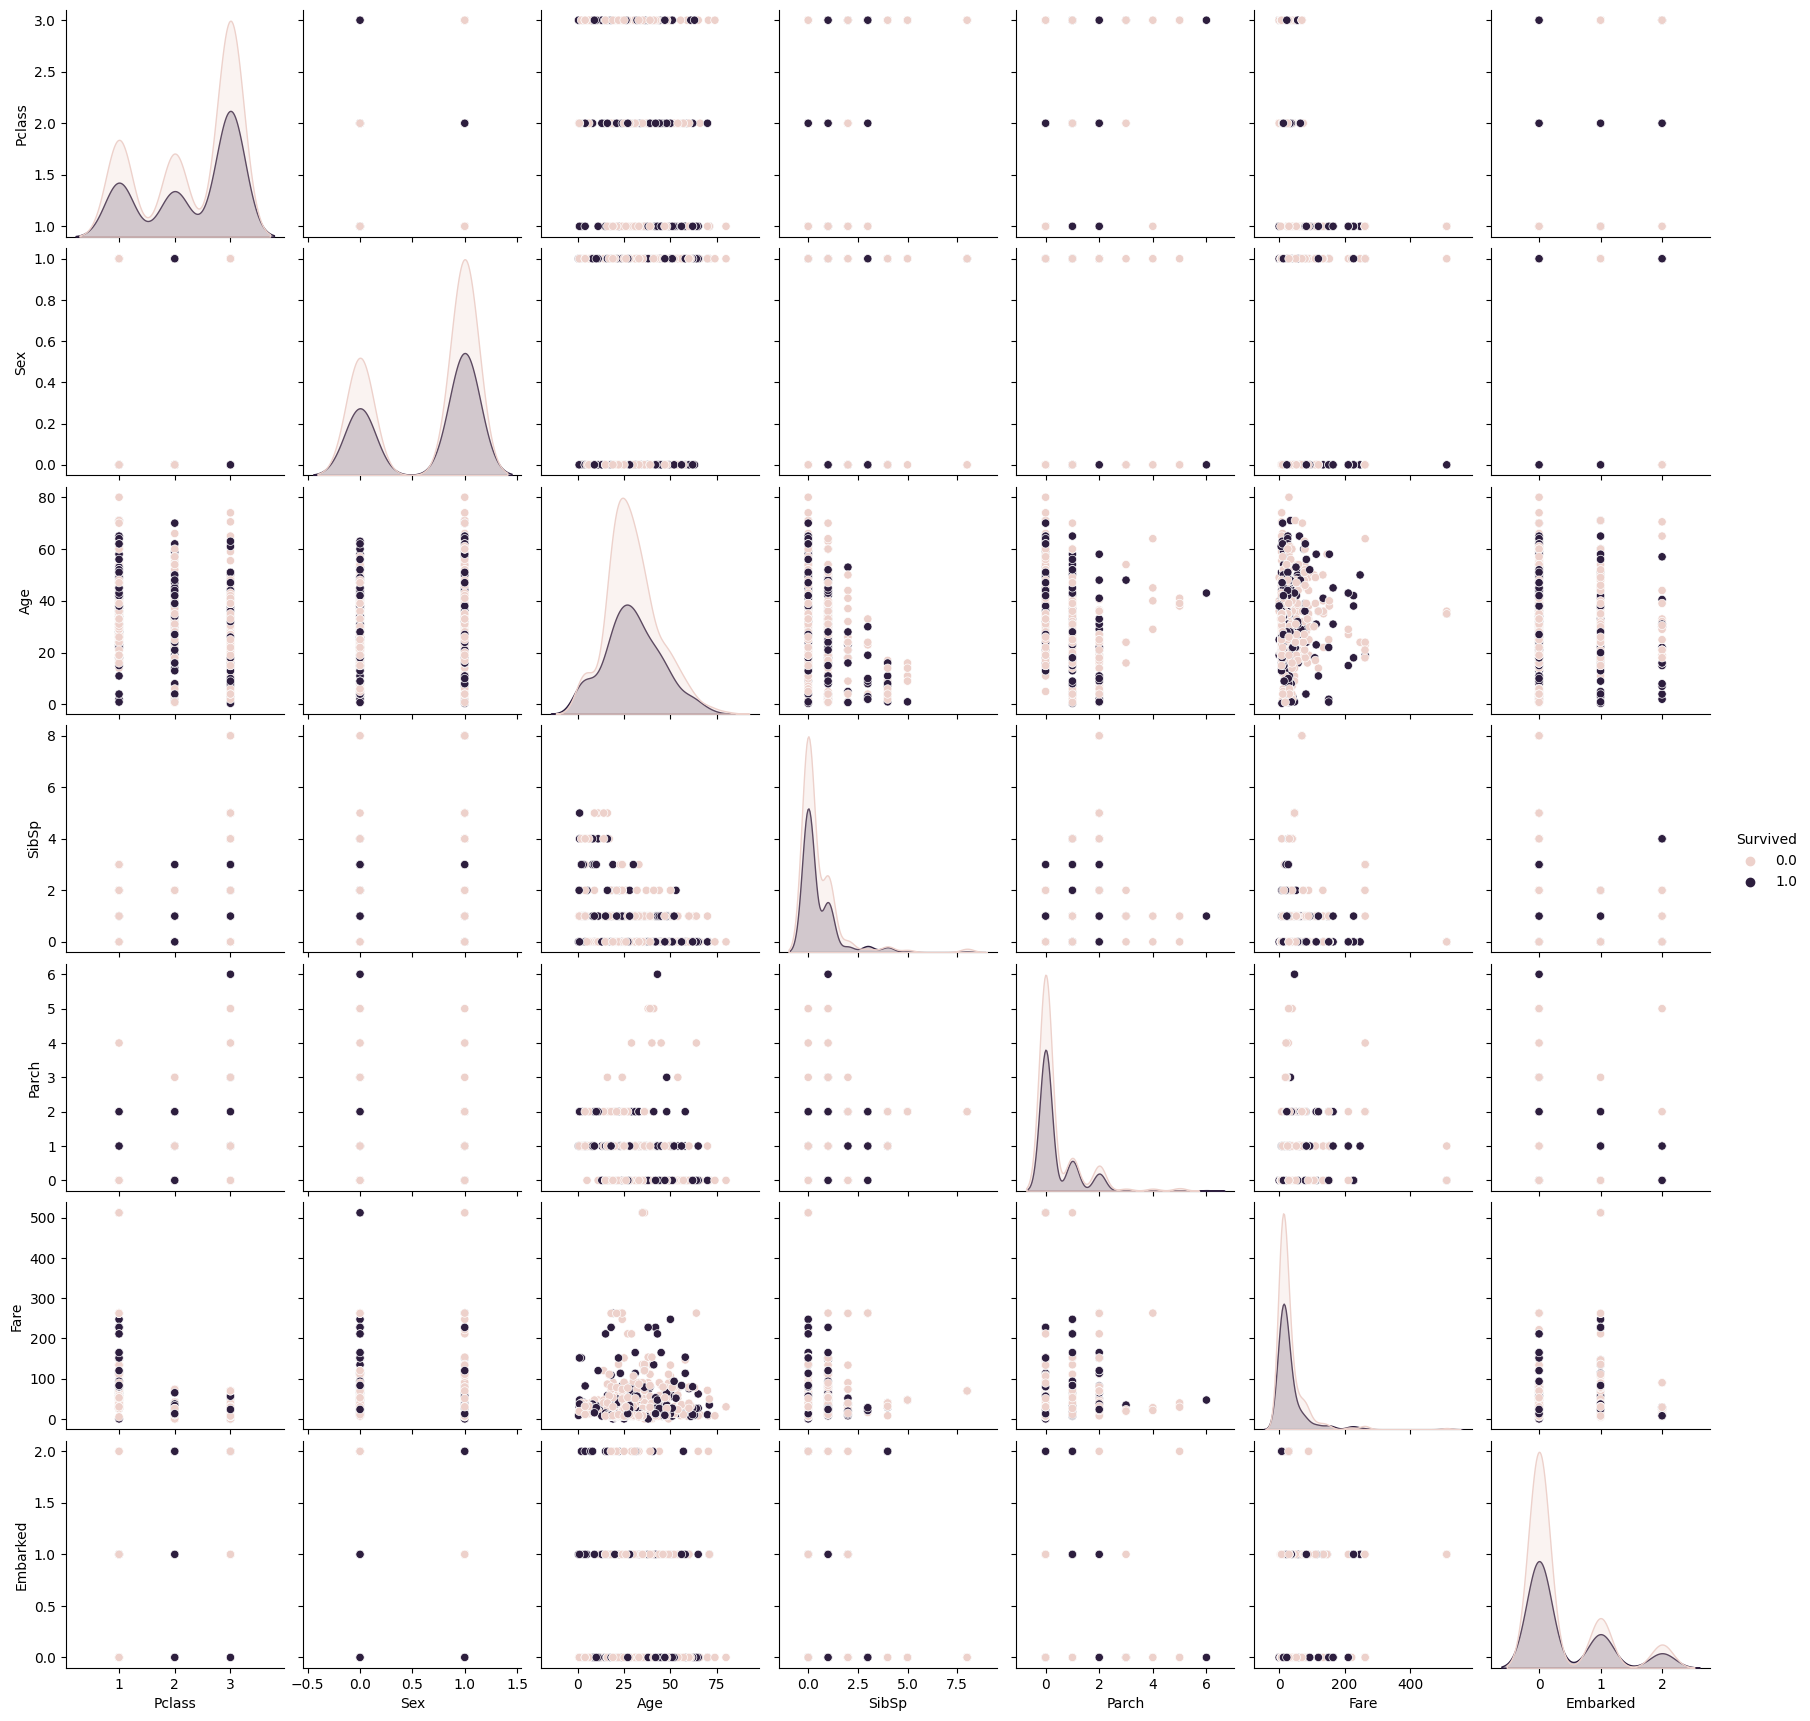

In [18]:
# построим для всех данных таблицы, для этого будем использовать Seaborn
import seaborn as sns

sns.pairplot(titanik, hue = "Survived")
# для каждой пары признаков есть график

In [19]:
# Корреляция признаков
passager.corr()

<ipython-input-19-66b142a7771e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  passager.corr()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593
Age,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


<ipython-input-25-264353ac9aed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(passager.corr(), annot = True)


<Axes: >

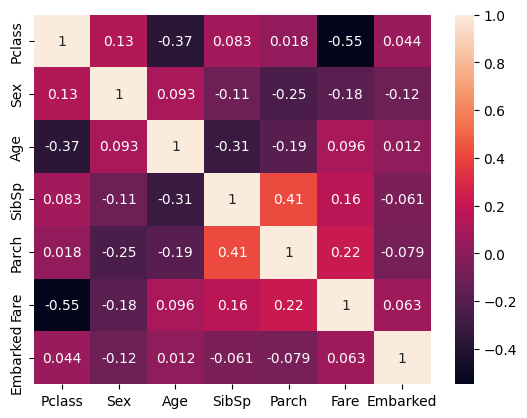

In [25]:
sns.heatmap(passager.corr(), annot = True)
# аргумент annot задает чтобы внутри ячеек были написаны значения

In [27]:
sns.countplot(titanik["Age"], hue=titanik["Survived"])

ValueError: ignored

In [33]:
#Задача №1
import pandas as pd
Video_blog_DF = pd.DataFrame({'Duration': [275, 383, 628, 712], 'Views': [305, 629, 843, 726], 'Likes':[23, 78, 65, 90], 'Dislikes':[5, 12, 26, 10], 'Comments':[2, 6, 15, 28]})
money = Video_blog_DF["Views"].sum() * 3
print(money)

7509
